In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv('weather_data.csv')
data.head()


,dewptc,hum,wndspd,pressure,rain,smoke,temp
0,28,59,20,1008,0,0,20
1,48,61,10,1012,1,0,21
2,24,53,3,1001,0,0,16
3,17,54,8,1002,0,0,16
4,27,51,5,1007,0,0,14


In [2]:
data = data.to_numpy()
data.shape

(1000, 7)

In [3]:
X_ = data[:, :6]
Y_ = data[:, 6]

split = 0.8 #using 70:30 split, random each time
train_samples = np.random.choice(X_.shape[0], int(split*X.shape[0]))
test_samples = np.array([i for i in range(X.shape[0]) if i not in list(train_samples)])

X = X_[[train_samples]]
Y = Y_[[train_samples]]

X_test = X[[test_samples]]
Y_test = Y[[test_samples]]


X_0 = X_train[Y_train == 0]
X_1 = X_train[Y_train == 1]

In [4]:
W = np.linalg.inv(X.T @ X) @ X.T @ Y[:, np.newaxis]
Y_pred = X @ W
np.sum((Y_pred-Y)**2)/Y.shape[0] #finding out the loss. No idea how good it is

147197.71957888172

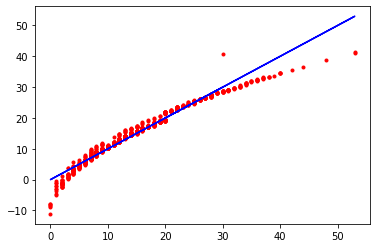

In [5]:
plt.plot(Y, Y_pred, 'r.')
plt.plot(Y, Y, 'b')
#plotting Y_pred vs Y. Blue line is Y vs Y.

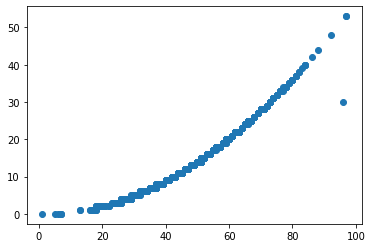

In [6]:
plt.scatter(X[:, 1], Y) # see a sort of parabolic curve here. How about adding a square here?

Text(0.5, 1.0, 'LOL')

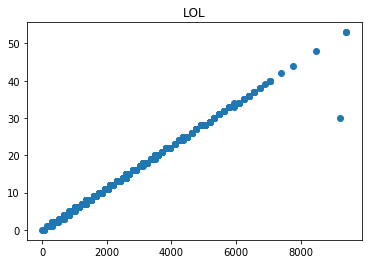

In [7]:
plt.scatter(X[:,1]**2, Y)
plt.title("LOL")

In [8]:
def phi(X):
    return np.concatenate((X, (X[:,1]**2)[:, np.newaxis]), axis=1)

PHI = phi(X)
W2 = np.linalg.inv(PHI.T @ PHI) @ PHI.T @ Y[:, np.newaxis]
Y_pred = PHI @ W2
np.sum((Y_pred-Y)**2)/Y.shape[0]

149559.08714304696

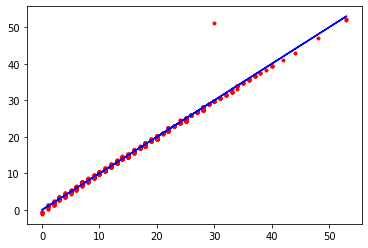

In [9]:
plt.plot(Y, Y_pred, 'r.')
plt.plot(Y, Y, 'b')
#plotting Y_pred vs Y. Blue line is Y vs Y.

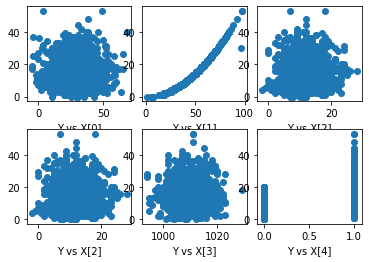

In [10]:

fig, ax = plt.subplots(2, 3, gridspec_kw={'wspace':0.1, 'hspace':0.3})
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [15, 9]
for i in range(2):
    for j in range(3):
        ax[i][j].scatter(X[:, 2*i + j], Y)
        ax[i][j].set_xlabel(f'Y vs X[{2*i + j}]')


In [11]:
print(f"W = {W}, W' = {W2}")

W = [[ 1.38792301e-03]
 [ 5.27324103e-01]
 [-2.39873717e-02]
 [-1.14251594e-02]
 [ 1.87905653e+00]
 [ 1.36098618e-01]], W' = [[ 0.00118729]
 [ 0.04310129]
 [-0.00381887]
 [-0.00115493]
 [ 0.12580974]
 [ 0.01205901]
 [ 0.00520182]]


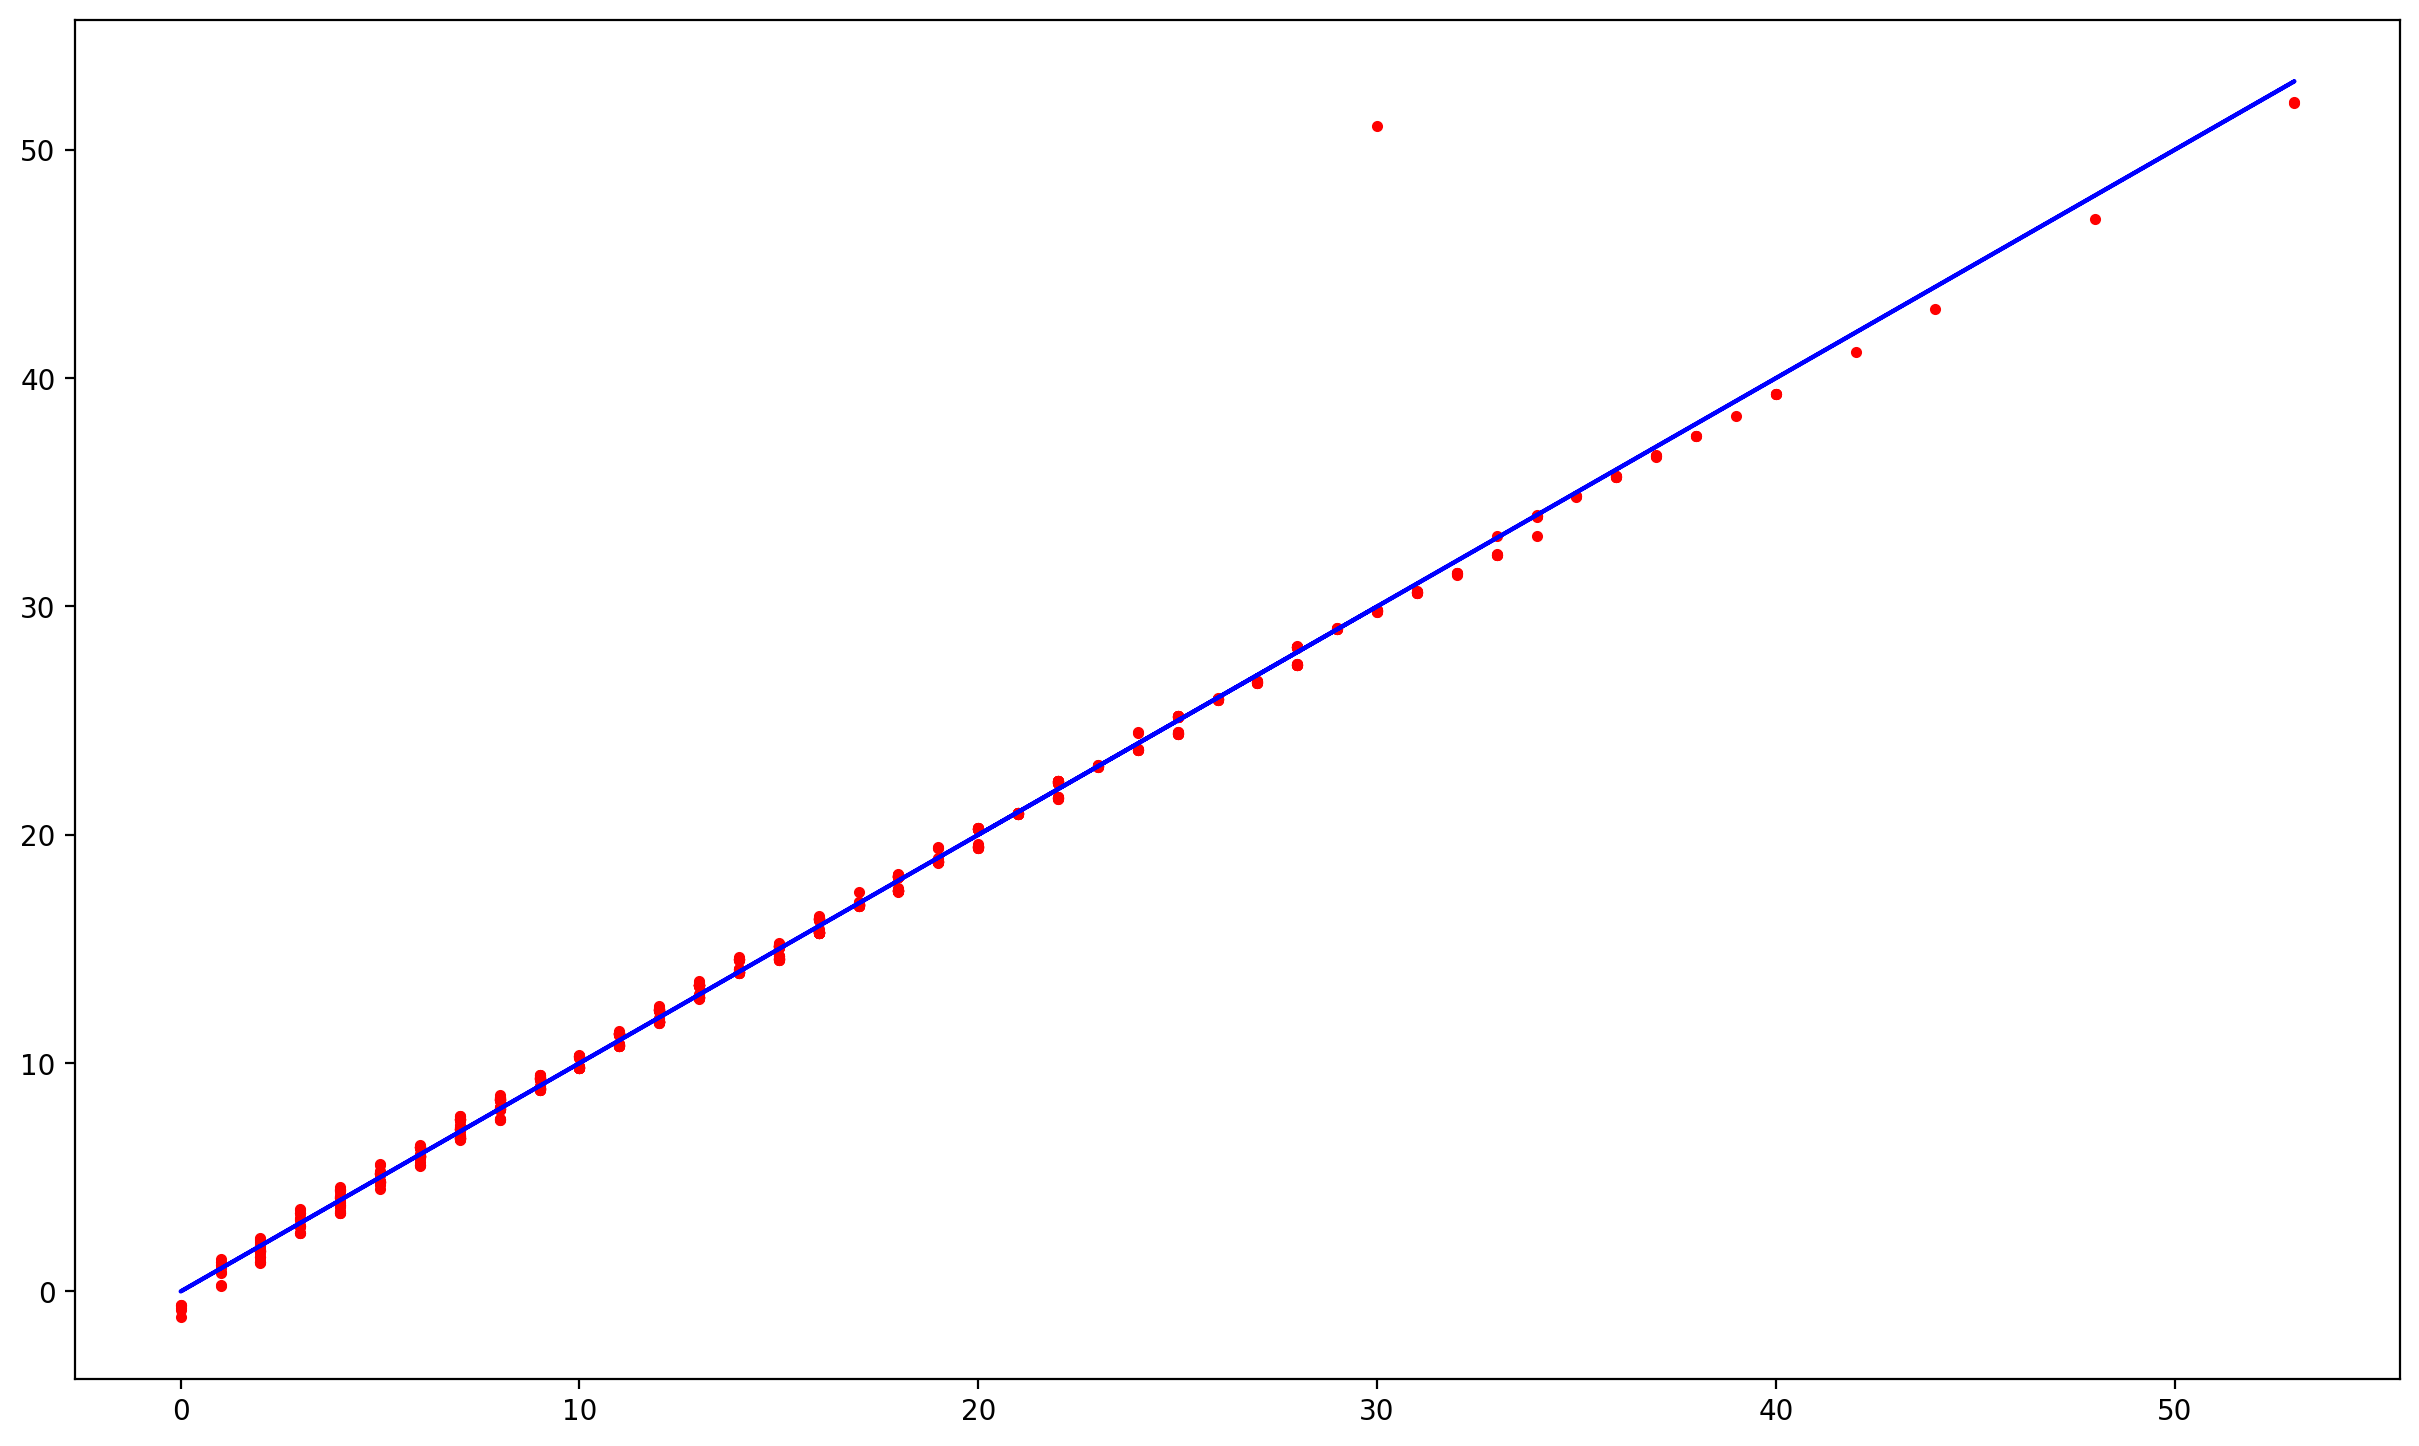

In [12]:
plt.plot(Y, Y_pred, 'r.')
plt.plot(Y, Y, 'b')
#plotting Y_pred vs Y. Blue line is Y vs Y.

In [13]:
Y.shape[0]

1000